Complete the exercises below For **Assignment #11**.

For this assignment we'll use the [California Housing Data](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

This data is available in the [Scikit-Learn](https://scikit-learn.org/stable/index.html) Python module.

To retrieve the data,
1. open a new Python notebook with the `data730` kernel, and,
2. run the following code.

```python
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

california_housing.data.to_csv('california-housing.csv', index=False)
```

This will produce a new file called `california-housing.csv` that we'll import in this notebook.

Back in the Python notebook, you can use the following snippet to get a description of the dataset.

```python
print(california_housing.DESCR)
```


Load the `tidymodels` package.

In [1]:
library(tidymodels)



── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



Run the following cell to read in our data.

In [7]:
housing = readr::read_csv('california-housing.csv', col_types = readr::cols())

housing |> tail()

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.7125,28,6.779070,1.148256,1041,3.026163,39.27,-121.56,1.168
1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847
2.3886,16,5.254717,1.162264,1387,2.616981,39.37,-121.24,0.894


Let's build a random forest model to predict `MedianHouseValue`.

1. Create your model, set the engine to `ranger` with `importance = 'impurity'` and the mode as `regression`.
2. Fit the model using `MedianHouseValue` as the response variable and all other columns as predictors.

In [8]:
mod = rand_forest() |>
    set_engine('ranger', importance = 'impurity') |>
    set_mode('regression')

mod_fit = mod |> fit(MedHouseVal ~ ., data = housing)


In [9]:
mod_fit



parsnip model object

Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, importance = ~"impurity",      num.threads = 1, verbose = FALSE, seed = sample.int(10^5,          1)) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      20640 
Number of independent variables:  8 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         impurity 
Splitrule:                        variance 
OOB prediction error (MSE):       0.2337928 
R squared (OOB):                  0.8244291 

❓ What is the OOB error for this model?

**Answer:** 0.234

Plot the feature importances using the `vip` package. Remember that you can use the `extract_fit_engine` function to get the `ranger` model object to send to the `vip` function.

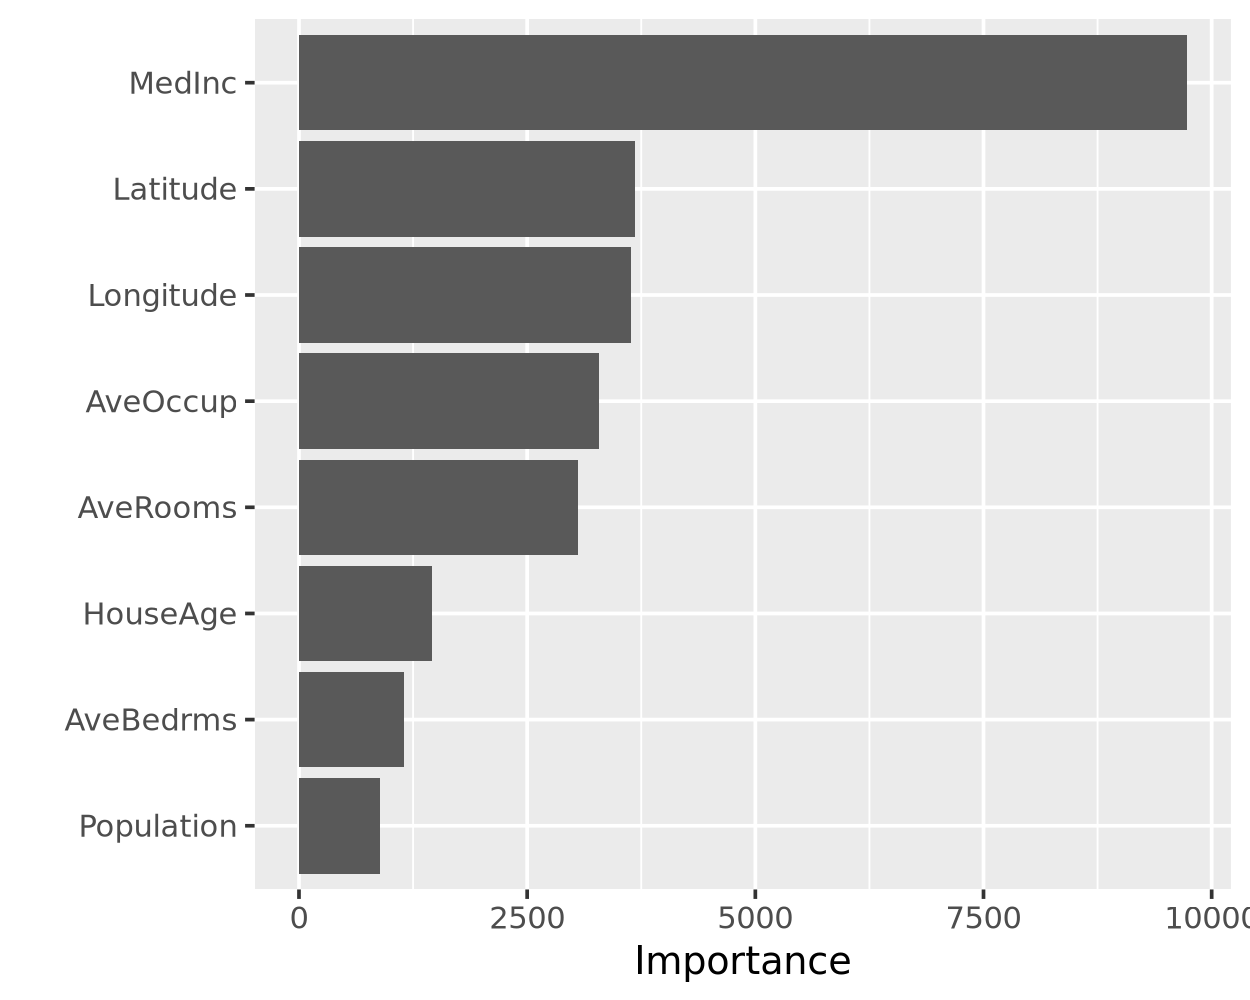

In [12]:
library(vip)

mod_fit |>
    extract_fit_engine() |>
    vip()

It looks like `Latitude` and `Longitude` are important for precicting home value. Let's explore those variables.

Install the `mapdata` package into your `data730` environment.

1. Open a Terminal, and,
2. Run the following command:

```bash
conda install -c conda-forge -n data730 r-mapdata
```

Load the `mapdata` package.

In [15]:
library(mapdata)



Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




The following code will generate a map of California. Adapt this code to plot `Latitude` and `Longitude` from the `housing` dataset, color points by the `MedianHouseValue`. [Here is an example for reference](https://raw.githubusercontent.com/UNC-DATA-730/a10/main/example.png).


```r
california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +
    coord_quickmap() +
    theme_void()
```

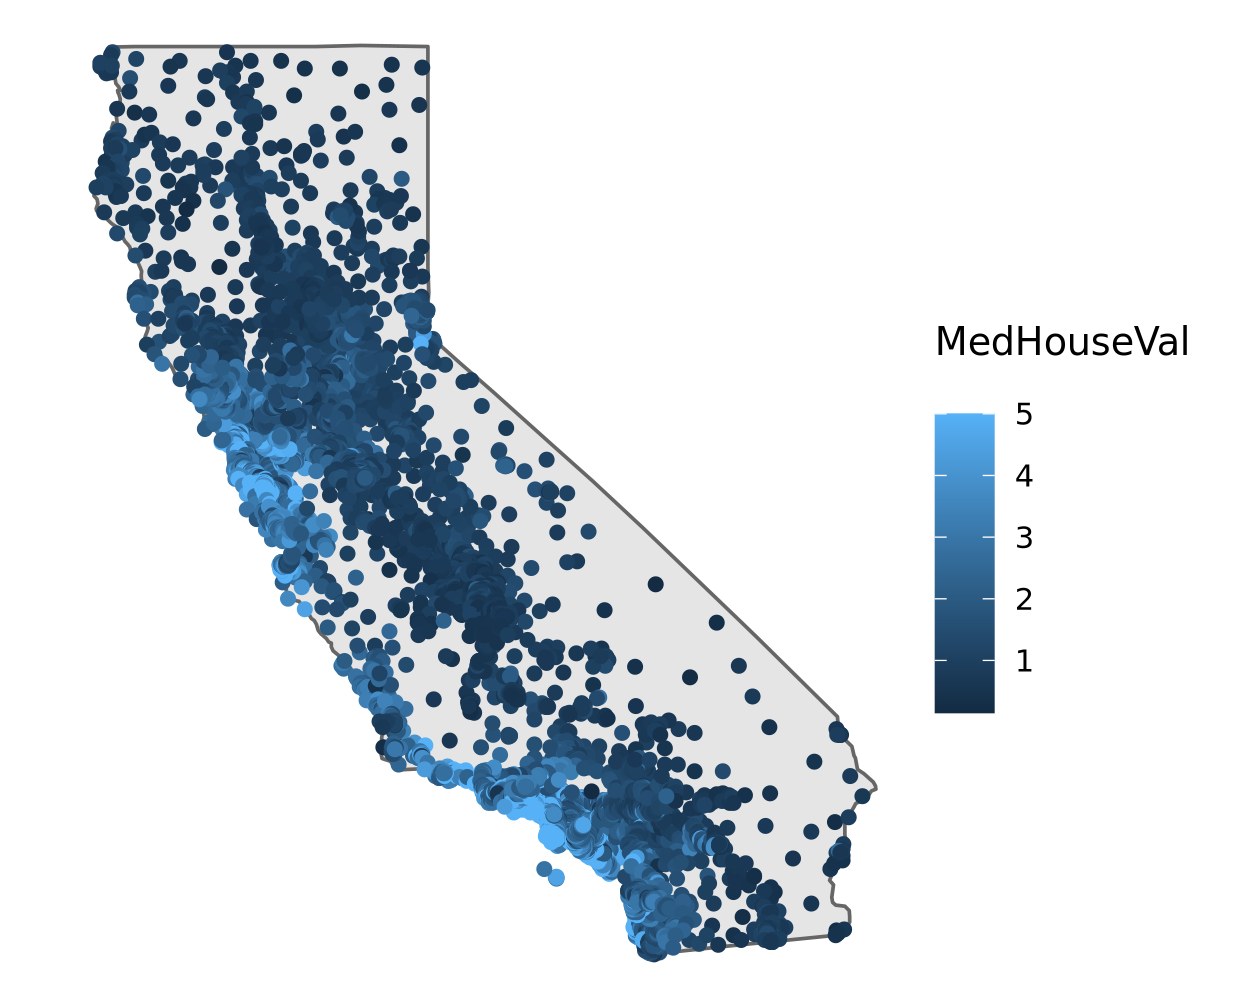

In [45]:
california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +
    coord_quickmap() +
    theme_void() +
    geom_point(data=housing, aes(Longitude, Latitude, color=MedHouseVal)) 

